In [1]:
import matplotlib.pyplot as plt

from project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [2]:
logs_path = get_data_path("solver_logs")
log_path = logs_path / "experiment013_shift_04.log"

In [3]:
df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=log_path,

)
df_cp_logs

,Time,BestSol
0,0.08,150536.0
1,0.11,100597.0
2,0.15,99451.0
3,0.19,99451.0
4,0.62,51406.0
...,...,...
316,3378.09,7941.0
317,3380.88,7941.0
318,3415.70,7941.0
319,3430.42,7941.0


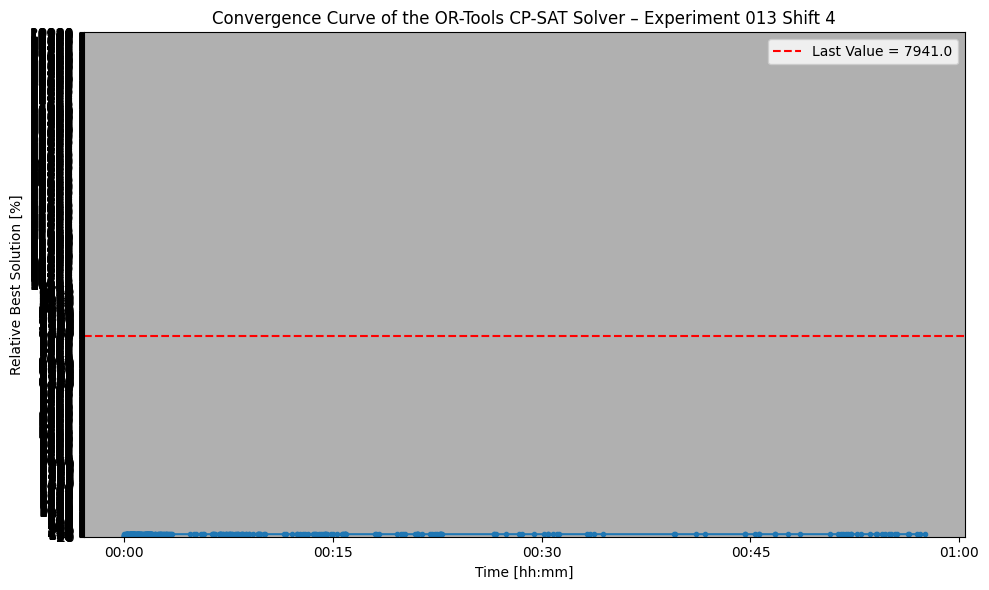

In [4]:
fig = DataFramePlotGenerator.get_convergence_plot_figure(df_cp_logs, time_col="Time", bestsol_col="BestSol", granularity="auto",subtitle="Experiment 013 Shift 4",
    y_max= 20000
)
last_val = df_cp_logs["BestSol"].iloc[-1]

ax = fig.axes[0]
ax.axhline(y=last_val, color="red", linestyle="--", label=f"Last Value = {last_val}")
ax.legend()
plt.show()